Code to reproduce Figure 11 from "Bioinspired Adaptive Visual Servoing Control for Quadrotors"

In [3]:
##Import necessary modules
###Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from natsort import natsorted
import matplotlib.patches as patches


In [4]:
###Load traces
# Define the folder path
folder_path = '/home/myedut/Downloads/raw_bebop_data/Landings_clean/'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter the list to include only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Sort the list of CSV files by their names
csv_files = natsorted(csv_files)
landing_traces=[]
# Import the sorted CSV files into a list
landing_traces = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

In [5]:
###Define function that allows to plot with alternating red and black colors 

def plot_with_alternating_colors(df, x_col, y_col, origin_color='red',colors=None, linewidth=2, alpha=1, switch_interval=10):
    """
    Plots a trajectory with alternating colors for each segment, marking the origin with quadrotor symbols.

    Parameters:
        df (DataFrame): DataFrame containing the trajectory data.
        x_col (str): Name of the column for x-axis values.
        y_col (str): Name of the column for y-axis values.
        colors (list): List of colors to alternate through. Defaults to black and red.
        linewidth (float): Width of the plotted lines.
        alpha (float): Transparency of the lines.
        switch_interval (int): Number of segments to plot with the same color before switching.
    """
    if colors is None:
        colors = ['black', 'red']
    
    num_colors = len(colors)
    
    # Plot the trajectory segments with alternating colors
    for j in range(len(df) - 1):
        color_index = (j // switch_interval) % num_colors
        
        x_segment = df[x_col].iloc[j:j+2]
        y_segment = df[y_col].iloc[j:j+2]
        
        plt.plot(x_segment, y_segment, color=colors[color_index], linewidth=linewidth, alpha=alpha)
    
    # Mark the origin with quadrotor symbols
        plt.scatter(df[x_col].iloc[0], df[y_col].iloc[0], color=origin_color, s=160, marker='*', edgecolor=origin_color, linewidth=.1, label='Origin (Quadrotor)')



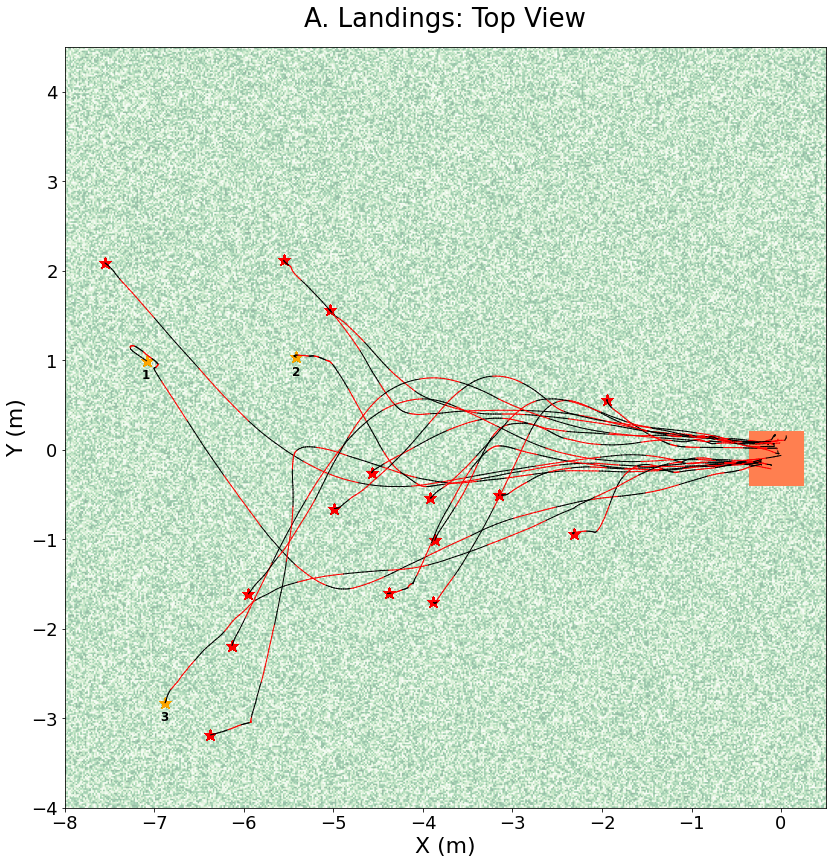

In [6]:

# Assuming landing_traces is a list of DataFrames, each containing 'pos_x' and 'pos_y' columns
plt.figure(figsize=(14, 14))
ax = plt.gca()  # Get the current axes instance

# Create a grass-like background using noise
x = np.linspace(-8, 0.5, 500)  # Background size
y = np.linspace(-4, 4.5, 500)
X, Y = np.meshgrid(x, y)
noise = np.random.rand(*X.shape) * 0.3 + 0.7  # Adjust to control grass density

# Overlay the noise as an image with green tint
ax.imshow(noise, extent=[min(x), max(x), min(y), max(y)], origin='lower', cmap='Greens', alpha=0.4)
special_colors=[4,6,10]
special_text=[0,1,2,3,'1',5,'2',7,8,9,'3',11,12,13,14,15,16,17]
# Plot each trajectory with red lines
# Assuming landing_traces is a list of DataFrames
for i, df in enumerate(landing_traces):
    # Check if the current index has a special color scheme
    if i in special_colors:
        colors = 'orange'
    else:
        colors = ['red']  # Default to solid red
    
    # Plot the trajectory with alternating colors or a single color
    plot_with_alternating_colors(df, x_col='pos_x', y_col='pos_y', origin_color=colors, linewidth=1, switch_interval=10)
    if i in special_colors:
        plt.text(df['pos_x'].iloc[0]-0.05, df['pos_y'].iloc[0] -0.2, special_text[i], color='black', fontsize=12,weight='bold')  # Adjust position as needed

# Add a coral rectangle at position (0, 0.1) with size 0.5 along both dimensions
coral_rectangle = patches.Rectangle((0.25, 0.2), -0.6, -0.6, linewidth=2, edgecolor='coral', facecolor='coral')
ax.add_patch(coral_rectangle)

# Set labels and title with adjustments
plt.xlabel('X (m)', fontsize=22)
plt.ylabel('Y (m)', fontsize=22)
plt.title('A. Landings: Top View', fontsize=26, pad=20)  # Adjust pad for title position


# Set tick size
ax.tick_params(axis='both', labelsize=18)  # Set tick labels to size 18
#plt.savefig('Landings_top_view_New.png', dpi=300, bbox_inches='tight')
plt.show()

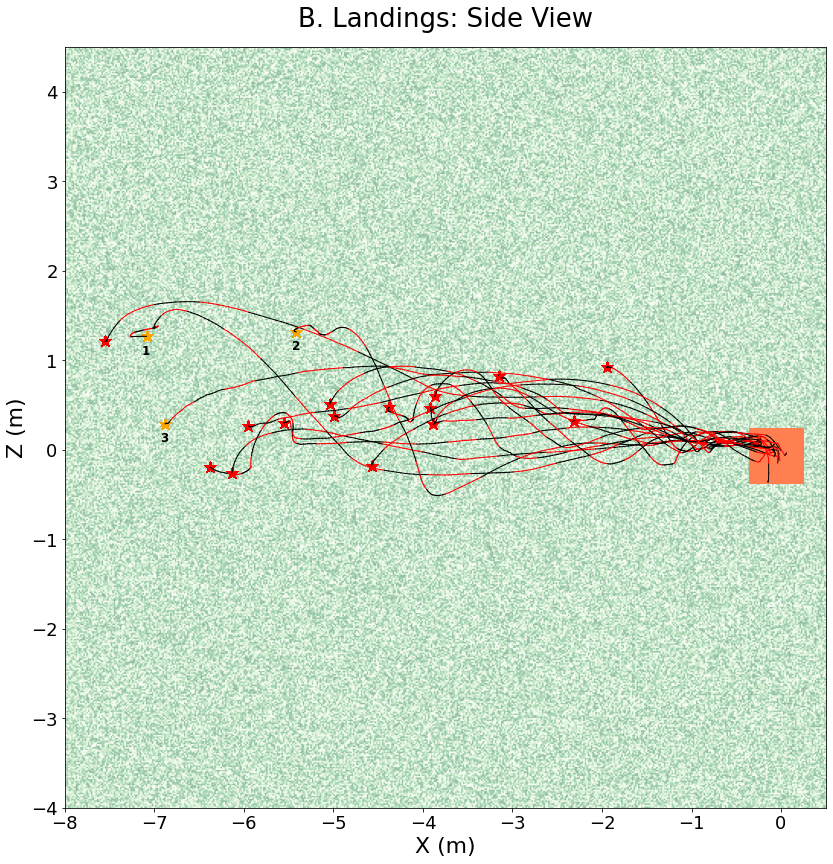

In [7]:
# Assuming landing_traces is a list of DataFrames, each containing 'pos_x' and 'pos_z' columns
plt.figure(figsize=(14, 14))
ax = plt.gca()  # Get the current axes instance

# Create a grass-like background using noise
x = np.linspace(-8, 0.5, 500)  # Background size
y = np.linspace(-4, 4.5, 500)
X, Y = np.meshgrid(x, y)
noise = np.random.rand(*X.shape) * 0.3 + 0.7  # Adjust to control grass density

# Overlay the noise as an image with green tint
ax.imshow(noise, extent=[min(x), max(x), min(y), max(y)], origin='lower', cmap='Greens', alpha=0.4)
special_colors=[4,6,10]
special_text=[0,1,2,3,'1',5,'2',7,8,9,'3',11,12,13,14,15,16,17]
# Plot each trajectory with red lines
# Assuming landing_traces is a list of DataFrames
for i, df in enumerate(landing_traces):
    # Check if the current index has a special color scheme
    if i in special_colors:
        colors = 'orange'
    else:
        colors = ['red']  # Default to solid red
    df['pos_z_inverted']=-1*df['pos_z']
    # Plot the trajectory with alternating colors or a single color
    plot_with_alternating_colors(df, x_col='pos_x', y_col='pos_z_inverted', origin_color=colors, linewidth=1, switch_interval=10)
    if i in special_colors:
        plt.text(df['pos_x'].iloc[0]-0.05, df['pos_z_inverted'].iloc[0] -0.2, special_text[i], color='black', fontsize=12,weight='bold')  # Adjust position as needed

# Plot each trajectory with red lines


# Add a coral rectangle at position (0.13, 0.16) with size 0.5 along both dimensions
coral_rectangle = patches.Rectangle((0.25, 0.23), -0.6, -0.6, linewidth=2, edgecolor='coral', facecolor='coral')
ax.add_patch(coral_rectangle)

# Set labels and title with adjustments
plt.xlabel('X (m)', fontsize=22)
plt.ylabel('Z (m)', fontsize=22)
plt.title('B. Landings: Side View', fontsize=26, pad=20)  # Adjust pad for title position

# Set tick size
ax.tick_params(axis='both', labelsize=18)  # Set tick labels to size 18
#plt.savefig('Landings_side_view_New.png',dpi=300, bbox_inches='tight')
plt.show()